Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "slava-qw"

---

# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [ ]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    for k in range(num_steps):
        y[k + 1] = y[k] + dt * (lam * y[k])
    return tt, y

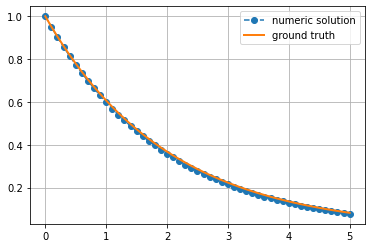

In [ ]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Тест I.1

Постройте решения как в ячейке выше для различных $\tau$ (в коде это `dt`), включая $|\lambda| \tau > 1$.

(1 point)

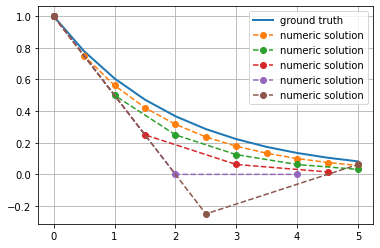

In [ ]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.5)
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(tt, y, 'o--', label='numeric solution')


tt, y = euler_solve(lam, u0=1.0, T=5, dt=1)
plt.plot(tt, y, 'o--', label='numeric solution')

tt, y = euler_solve(lam, u0=1.0, T=5, dt=1.5)
plt.plot(tt, y, 'o--', label='numeric solution')


tt, y = euler_solve(lam, u0=1.0, T=5, dt=2)
plt.plot(tt, y, 'o--', label='numeric solution')


tt, y = euler_solve(lam, u0=1.0, T=5, dt=2.5)
plt.plot(tt, y, 'o--', label='numeric solution')

plt.legend(loc='best')
plt.grid(True)
plt.show()

### Тест I.2

Решите то же самое уравнение $\frac{du}{dt} = \lambda u$, используя неявную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(1 point)

In [ ]:
def euler_solve_imp(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    for k in range(num_steps):
        y[k + 1] = ((1 + lam * dt / 2) / (1 - lam * dt / 2) )* y[k] 
    return tt, y

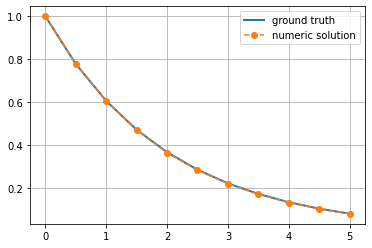

In [ ]:
lam = -0.5
tt, y = euler_solve_imp(lam, u0=1.0, T=5, dt=0.5)
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Поведение неявной схемы Эйлера дало более точный результат при одинакововм шаге стеки и параметре $\lambda$.

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [ ]:
def euler_solve_2(A, u0, T, dt):
    """Решает $du/dt = Au$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([len(u0), num_steps + 1])
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k + 1] = y[:, k] + dt * (A @ y[:, k])
    return tt, y

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(1 point)

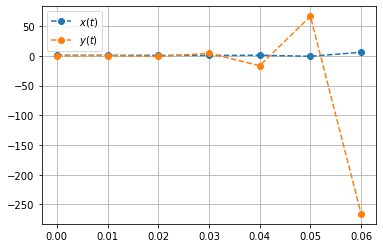

In [ ]:
A = np.array([[-10, 10], [32, -499]])
dt = 0.01
u0 = np.array([1, 0])
T = 0.06

tt, y = euler_solve_2(A, u0, T, dt)
plt.plot(tt, y[0], 'o--', label='$x(t)$')
plt.plot(tt, y[1], 'o--', label='$y(t)$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Метод не стабилен на шаге такого размера, что выдно из графиков решений, меняя значения $T$. Если, например, уменьшить шаг сетки до 0,001, то полученные графики решений будут выглядеть намного четче.

In [ ]:
A = np.array([[-10, 10], [32, -499]])
np.linalg.eigvals(A)

array([  -9.34647667, -499.65352333])

Как известно, систма ОДУ является жесткой, если:
$$
\begin{equation*}
 \begin{cases}
   Re (\lambda_{i}) < 0, \forall i = \{1, 2\} \\
   S = \frac{\underset{1 \leqslant i \leqslant 2 } {max} (Re (\lambda_{i}))}{\underset{1 \leqslant i \leqslant 2 } {min}(Re (\lambda_{i}))} \gg 1 \\
 \end{cases}
\end{equation*}
$$

В нашем случае число жесткости $S \approx 53,46 $ (см. результаты ячейки выше), что больше единицы, поэтому данную систему можно считать жесткой.

### Тест II.2

Реализуйте $\textit{неявную}$ схему Эйлера для системы уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(1 point)

In [ ]:
def euler_solve_2_imp(A, u0, T, dt):
    """Решает $du/dt = Au$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([len(u0), num_steps + 1])
    y[:, 0] = u0
    B = np.eye(2) - dt * A
    for k in range(num_steps):
        y[:, k + 1] = np.linalg.solve(B, y[:, k])
    return tt, y

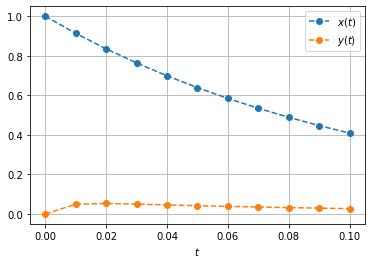

In [ ]:
A = np.array([[-10, 10], [32, -499]])
dt = 0.01
u0 = np.array([1, 0])
T = 0.1

tt, y = euler_solve_2_imp(A, u0, T, dt)
plt.plot(tt, y[0], 'o--', label='$x(t)$')
plt.plot(tt, y[1], 'o--', label='$y(t)$')
plt.legend(loc='best')
plt.xlabel('$t$')
plt.grid(True)
plt.show()

Сравнивая графики решений, видим, что неявный метод Эйлера дает более точный результат.

# III. Модель Ланкастера

Рассмотрим модель Ланкастера: две армии, численность которых $x_1(t)$
и $x_2(t)$ соответственно, истребляют друг друга:

$$
\begin{cases}
\frac{d\,x_1}{dt} = - c_2 x_2,\\
\frac{d\,x_2}{dt} = - c_1 x_1
\end{cases}
$$

Война заканчивается в момент времени $T$, если численность какой-то из армий становится равна нулю $x_i(T)=0$ .


Для удоства будем исчилять время в $1/c_1$, тогда далее везде считаем $c_1=1, c_2=c$.

$$
\frac{d}{dt}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}= 
\begin{pmatrix}
0& -c\\
-1& 0
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$
Можно явно выписать решение, найдя характеристические числа и собственные вектора
$$
\mathbf{x} = \sum_\pm C_{\pm}\mathbf{e_\pm} e^{\lambda_{\pm}t}, \; \lambda_{\pm} = \pm \sqrt{c}, \mathbf{e}_{\pm} = (\mp \sqrt{c}, 1)
$$

### Тест III.1 
Однако, если нас интересуют фазовые траектории (например кто победит), достаточно заметить, что у этой системы есть первый интеграл движения $I(x_1,x_2)=const$ (она Гамильтонова).

Найдите его, какая начальная численность первой армии $x_1(0)$ необходима для её победы? $x_{1min}(c, x_2(0))$

Введем обозначения: $q = x_1,\ p = x_2$, тогда систему ОДУ выше можно переписать следующим образом:
$$
\begin{cases}
\dot q = - c p\\
\dot p = - q
\end{cases}
$$

Как известно уравнения Гамильтона для гамильтонина $H$ выглядят следующим образом:

$$
\begin{cases}
\dot q = \frac{\partial H}{\partial p}\\
\dot p = - \frac{\partial H}{\partial q}
\end{cases}
$$

Используя эти две системы получим:

$$
\begin{cases}
\frac{\partial H}{\partial p} = - cp\\
\frac{\partial H}{\partial q} = q
\end{cases}
$$

Беря частный интеграл от первого уравнения полученной системы, находим, что $H = -cp^2/2 + C(q)$, используя второе уравнение, получим, что $C_q(q) = q \Rightarrow C(q) = q^2/2 $ и тогда гамильтониан примет вид:

$$
H(q, p) =\frac{q^2}{2} -\frac{c p^2}{2}
$$

Заметим, что гамильтониан $H$ явно не зависит от времени $t$, а это значит, что сохраняется первый интеграл движения (энергия гамильтоновой системы) $I(q, p) = H(q, p)$.

Таким образом, возвращаясь к исходним переменным, получим  интеграл движения следующего вида:
$$
I(x, y) = \frac{x_1^2}{2} -\frac{c x_2^2}{2}
$$

Для поиска необходимой дял победы численнойсти первой армии воспользуемся найденным инвариантом. Тогда $x_1^2(t) -cx_2^2(t) = const, \ \forall t$, а значит:
$$
x_1^2(0) - cx_2^2(0) = x_1^2(T) \Rightarrow x_1(0) = \sqrt{x_1^2(T) + cx_2^2(0)}
\Rightarrow
\\
\Rightarrow x_1(0) \geqslant \sqrt{c} \  x_2(0)
$$

### Тест III.2

Поробуем численно решить задачу для $c=2, x_2(0)=1$ при трёх начальных $x_1(0) = x_{1min}(c=2,x_2(0)=1)\times[1+10^{-2}, 1+ 10^{-1}, 2]$. 

Подправьте явную или неявную схему Эйлера так, чтобы она интегрировала до момента победы.
Реализуйте схему Рунге - Кутта второго порядка с тем же требованием.


**Постройте в двойном логарифмическом масштабе отклонение $I(T)$ от истинного значения
$\delta I = |I(x(T),y(T)) - I(x_1(0),x_2(0))|$ в зависимости от шага интегрирования $\tau$**, проинтегрировав 
* методом Эйлера для трёх указнных $x_1(0)$ и различных $\tau$
* методом Рунге - Кутта для трёх указанных $x_1(0)$ и различных $\tau$

(Должно быть 6 линий на графике - двумя методами каждую из $x_1(0)$)

(Используйте сплошные линии для Эйлера и пунктирные для РК, цветом различайте начальные $x_1(0)$)

(Шаги интегрирования $\tau$ удобно уменьшать как $2^{-N}$ или сгенерировать как `np.logspace` )

*Как полученные кривые соотносятся с теоретическим порядком аппроксимации схем?*


(4 point)

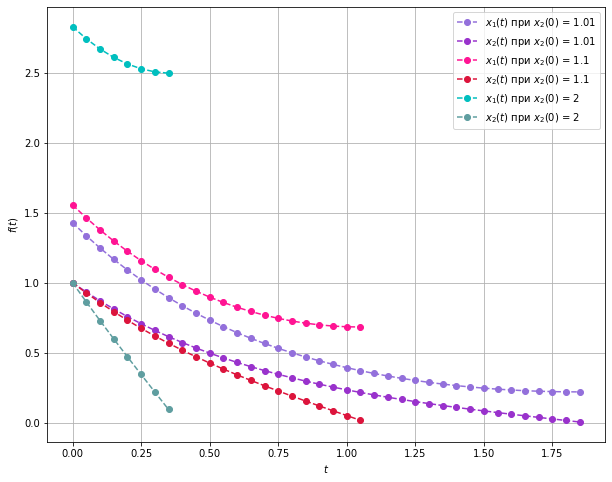

In [ ]:
# Implicity Euler's sheme
import numpy as np
import matplotlib.pyplot as plt
def euler_solve_2_imp_lankaster(A, u0, T, dt):
    """Решает $du/dt = Au$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([len(u0), num_steps + 1])
    y[:, 0] = u0
    B = np.eye(2) - dt * A
    for k in range(num_steps):
      y[:, k + 1] = np.linalg.solve(B, y[:, k])
    return tt, y

c = 2
dt = 0.05
A = np.array([[0, -c], [-1, 0]])
x2_0_inputs = [1.01, 1.1, 2]
x1_0_list = np.sqrt(c)* np.array(x2_0_inputs)
colors = {
    0: ['mediumpurple', 'darkorchid'],
    1: ['deeppink', 'crimson'], 
    2: ['c', 'cadetblue']
          }

plt.figure(figsize=(10, 8))


for i in range(len(x1_0_list)):
  z0 = np.array([x1_0_list[i], 1])
  T = 1 / (2 * np.sqrt(c)) * np.log(abs((z0[0] + np.sqrt(c) * z0[1]) / (z0[0] - np.sqrt(c) * z0[1])))


  tt, y = euler_solve_2_imp_lankaster(A, z0, T, dt)
  x1 = y[0]
  x2 = y[1]

  plt.plot(tt, x1, 'o--', label=f'$x_1(t)$ при $x_2(0)$ = {x2_0_inputs[i]}', color=colors[i][0])
  plt.plot(tt, x2, 'o--', label=f'$x_2(t)$ при $x_2(0)$ = {x2_0_inputs[i]}', color=colors[i][1])

plt.legend(loc='best')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid(True)
plt.show()

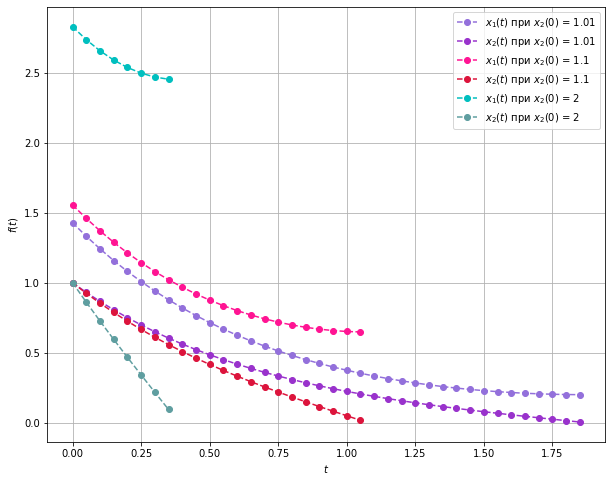

In [ ]:
# second-order Runge-Kutta scheme 
def RK2(A, u0, T, dt):
    """Решает $du/dt = Au$ на $0 < t < T$ с $u(t=0) = u0$ при помощи метода Рунге-Кутта (c \alpha = 1) с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([len(u0), num_steps + 1])
    y[:, 0] = u0
    for k in range(num_steps):
      k1 = A @ y[:, k]
      k2 = A @ ((dt / 2) * k1)

      y[:, k + 1] =  y[:, k] + dt * (k1 + k2)
    return tt, y

c = 2
dt = 0.05
A = np.array([[0, -c], [-1, 0]])
x2_0_inputs = [1.01, 1.1, 2]
x1_0_list = np.sqrt(c)* np.array(x2_0_inputs)
colors = {
    0: ['mediumpurple', 'darkorchid'],
    1: ['deeppink', 'crimson'], 
    2: ['c', 'cadetblue']
          }

plt.figure(figsize=(10, 8))


for i in range(len(x1_0_list)):
  z0 = np.array([x1_0_list[i], 1])
  T = 1 / (2 * np.sqrt(c)) * np.log(abs((z0[0] + np.sqrt(c) * z0[1]) / (z0[0] - np.sqrt(c) * z0[1])))


  tt, y = RK2(A, z0, T, dt)
  x1 = y[0]
  x2 = y[1]

  plt.plot(tt, x1, 'o--', label=f'$x_1(t)$ при $x_2(0)$ = {x2_0_inputs[i]}', color=colors[i][0])
  plt.plot(tt, x2, 'o--', label=f'$x_2(t)$ при $x_2(0)$ = {x2_0_inputs[i]}', color=colors[i][1])

plt.legend(loc='best')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.grid(True)
plt.show()

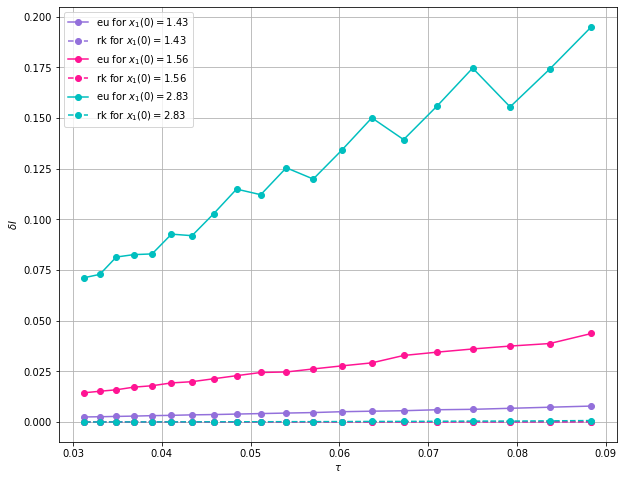

In [ ]:
def euler_solve_2(A, u0, T, dt):
    """Решает $du/dt = Au$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([len(u0), num_steps + 1])
    y[:, 0] = u0
    for k in range(num_steps):
        y[:, k + 1] = y[:, k] + dt * (A @ y[:, k])
    return tt, y

def euler_solve_2_imp_lankaster(A, u0, T, dt):
    """Решает $du/dt = Au$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([len(u0), num_steps + 1])
    y[:, 0] = u0
    B = np.eye(2) - dt * A
    for k in range(num_steps):
      y[:, k + 1] = np.linalg.solve(B, y[:, k])
    return tt, y

def RK2(A, u0, T, dt):
    """Решает $du/dt = Au$ на $0 < t < T$ с $u(t=0) = u0$ при помощи метода Рунге-Кутта (c \alpha = 1) с шагом dt"""
    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([len(u0), num_steps + 1])
    y[:, 0] = u0
    for k in range(num_steps):
      k1 = A @ y[:, k]
      k2 = A @ ((dt / 2) * k1)

      y[:, k + 1] =  y[:, k] + dt * (k1 + k2)
    return tt, y

c = 2
N = -5
A = np.array([[0, -c], [-1, 0]])
x2_0_inputs = [1.01, 1.1, 2]
x1_0_list = np.sqrt(c)* np.array(x2_0_inputs)
x2_0 = 1
colors = {
    0: ['mediumpurple', 'darkorchid'],
    1: ['deeppink', 'crimson'], 
    2: ['c', 'cadetblue']
          }
plt.figure(figsize=(10, 8))


for i in range(len(x1_0_list)):
  data = [[], [], []]
  I_0 = 0.5 * (x1_0_list[i] ** 2 - c * x2_0 ** 2)
  z0 = np.array([x1_0_list[i], x2_0])
  T = 1 / (2 * np.sqrt(c)) * np.log(abs((z0[0] + np.sqrt(c) * z0[1]) / (z0[0] - np.sqrt(c) * z0[1])))
  tau = np.logspace(-3.5, N, 20, base=2)

  for dt in tau:
    
    _, a = euler_solve_2_imp_lankaster(A, z0, T, dt)
    _, b = RK2(A, z0, T, dt)

    x1_T_eu = a[0][-1]
    x2_T_eu = a[1][-1]

    x1_T_rk = b[0][-1]
    x2_T_rk = b[1][-1]

    I_T_eu = 0.5 * (x1_T_eu ** 2 - c * x2_T_eu ** 2)
    I_T_rk = 0.5 * (x1_T_rk ** 2 - c * x2_T_rk ** 2)

    data[0].append(dt)
    data[1].append(abs(I_T_eu - I_0))
    data[2].append(abs(I_T_rk - I_0))

  plt.plot(data[0], data[1], '-o', label=f'eu for $x_1(0) =${round(x1_0_list[i], 2)}', color=colors[i][0])
  plt.plot(data[0], data[2], '--o', label=f'rk for $x_1(0) =${round(x1_0_list[i], 2)}', color=colors[i][0])

plt.legend(loc='best')
plt.xlabel('$\\tau$')
plt.ylabel('$\delta I$')
plt.grid(True)
plt.show()

Метод Эйлера имеет порядок точнсти $O(h)$, а метод Рунге-Кутты 2-ого порядка имеет точность $O(h^2)$. Эти точности определяют погрешность найденного решения системы ОДУ относительно реального. Поэтому погрешность для $\delta I$ имеет порядок $O(h)$ для метода Эйлера и $O(h^2)$ для метода Рунге-Кутты 2-ого порядка. Линейный и квадратичный спад хорошо наблюдаются, если **отдельно** построить графики для этих двух методов.

Вернёмся к аналитическому рассмотрению.
Найдите явно решение $\mathbf{x}(t)$ в зависимости от начальных $x_1(0), x_2(0)$, выразив через них $C_{\pm}$.
Получите формулу для времени окончания войны $T(x_1(0), x_2(0))$.
Постройте на одном холсте при $c=\frac{3}{2}$
* Несколько фазовых траекторий (линий $I(x_1,x_2) = const$ с различными константами)
* Несколько линий уровня $T(x_1(0), x_2(0))$ (ГМТ начальных данных, где время войны фиксированно)

Итоговый график должен быть информативным, не забудьте в частности указать чему равны $T$ на изолиниях (лучше подписать на самих линиях как в `plt.clabel(curves)`, а не в легенде)

Можете ли вы получить асимтотическое выражение для $T$ при $x_1(0) = x_{1min} + \epsilon, \epsilon\ll1$?

(3 point)

Из уравнений выше:

$$
\begin{pmatrix}
x_1(t)\\
x_2(t)
\end{pmatrix}
= C_+
\begin{pmatrix}
-\sqrt c\\
1
\end{pmatrix}
e^{\sqrt{c}t} +
C_-
\begin{pmatrix}
\sqrt c\\
1
\end{pmatrix}
e^{-\sqrt{c}t} 
$$

Запишем это векторное уравнение в виде системы:

$$
\begin{cases}
x_1(t) = -\sqrt c\ C_+e^{\sqrt{c}t} + \sqrt c\ C_-e^{-\sqrt{c}t}\\
x_2(t) = C_+e^{\sqrt{c}t} + C_-e^{-\sqrt{c}t}
\end{cases}
$$

Тогда при $t = 0$:

$$
\begin{cases}
x_1(0) = \sqrt c(\ C_- - C_+)\\
x_2(0) = C_- + C_+
\end{cases}
$$

Выражая неизвестные констатны через начальные условия, получим:

$$
C_+ = \frac{\sqrt c \ x_2(0) - x_1(0)}{2\sqrt c}\\
C_-  = \frac{\sqrt c \ x_2(0) + x_1(0)}{2\sqrt c}
$$

Тогда явное решение примет вид:

$$
\begin{pmatrix}
x_1(t)\\
x_2(t)
\end{pmatrix}
= \frac{\sqrt c \ x_2(0) - x_1(0)}{2\sqrt c}
\begin{pmatrix}
-\sqrt c\\
1
\end{pmatrix}
e^{\sqrt{c}t} +
\frac{\sqrt c \ x_2(0) + x_1(0)}{2\sqrt c}
\begin{pmatrix}
\sqrt c\\
1
\end{pmatrix}
e^{-\sqrt{c}t} 
$$


При конце войны численность одной из армий равна нулю, то есть при $x_1(T) = 0$ или $x_2(T) = 0$.

При выигрыше первой армии:

$$
x_2(T) = 0 \Leftrightarrow \frac{\sqrt c \ x_2(0) - x_1(0)}{2\sqrt c}e^{\sqrt{c}\ T} + \frac{\sqrt c \ x_2(0) + x_1(0)}{2\sqrt c} e^{-\sqrt{c}\ T} = 0 \Rightarrow \\
\\
\\
\Rightarrow T = \frac{1}{2\sqrt{c}}\ln{\left(\left|\frac{x_1(0) + \sqrt c \ x_2(0)}{x_1(0) - \sqrt c \ x_2(0)}\right|\right)} 
$$

При выигрыше второй армии:

$$
x_1(T) = 0 \Leftrightarrow -\sqrt c\frac{\sqrt c \ x_2(0) - x_1(0)}{2\sqrt c}e^{\sqrt{c}\ T} + \sqrt c \frac{\sqrt c \ x_2(0) + x_1(0)}{2\sqrt c} e^{-\sqrt{c}\ T} = 0  \underset{c \ \neq \ 0}\Rightarrow \\
\\
\\
\underset{c \ \neq \ 0}\Rightarrow T = \frac{1}{2\sqrt{c}}\ln{\left(\left|\frac{x_1(0) + \sqrt c \ x_2(0)}{x_1(0) - \sqrt c \ x_2(0)}\right|\right)} 
$$

Таким образом, при такой постановки задачи время победы одной из армий будет равно

$$
T = \frac{1}{2\sqrt{c}}\ln{\left(\left|\frac{x_1(0) + \sqrt c \ x_2(0)}{x_1(0) - \sqrt c \ x_2(0)}\right|\right)} 
$$

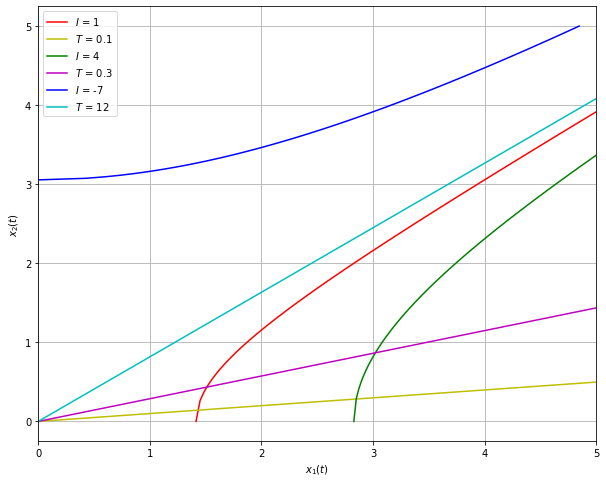

In [ ]:
c = 1.5
consts_I = [1, 4, -7]
consts_T = [0.1, 0.3, 12]
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']

plt.figure(figsize=(10, 8))

for i in range(len(consts_I)):
  color = colors[i]
  const = consts_I[i]
  T = consts_T[i]
  
  if const < 0:
    x2_sym = np.linspace(np.sqrt(-2 * const / c), 5, 100)
    x1 = np.sqrt(c * x2_sym ** 2 + 2 * const)
    plt.plot(x1, x2_sym, color=color, label=f'$I$ = {const}')
  else:
    x1 = np.linspace(np.sqrt(2 * const), 5, 100)
    x2 =  np.sqrt((1/c) * (x1 ** 2 - 2 * const))
    plt.plot(x1, x2, color=color, label=f'$I$ = {const}')

  x1_0 = np.linspace(0, 5, 100)
  perm_const = np.e ** (2 * np.sqrt(c) * T)
  new_perm_const = (1/np.sqrt(c)) * ((perm_const - 1)/ (perm_const + 1))
  x2_0 = new_perm_const * x1_0 

  plt.plot(x1_0, x2_0, color=colors[i + 3], label=f'$T$ = {T}')


plt.grid(True)
plt.legend(loc='best')
plt.xlabel('$x_1(t)$')
plt.ylabel('$x_2(t)$')
plt.xlim(0, 5)
plt.show()

Получим асимтотическое выражение для $T$ при $x_1(0) = x_{1min} + \varepsilon, \varepsilon\ll1, x_{1min} = \sqrt c \ x_2(0) \Rightarrow x_1(0) = \sqrt c \ x_2(0) + \varepsilon$

Подставим эти значения в полученную выше формулу и воспользуемся разложением в ряд Тейлора:

$$
T = \frac{1}{2\sqrt{c}}\ln{\left(\left|\frac{x_1(0) + \sqrt c \ x_2(0)}{x_1(0) - \sqrt c \ x_2(0)}\right|\right)} = \frac{1}{2\sqrt{c}}\ln{\left(\left|\frac{\sqrt c \ x_2(0) + \varepsilon + \sqrt c \ x_2(0)}{\sqrt c \ x_2(0) + \varepsilon - \sqrt c \ x_2(0)}\right|\right)} = \frac{1}{2\sqrt{c}}\ln{\left(\frac{\varepsilon + 2\sqrt c \ x_2(0)}{\varepsilon}\right)} = \\ = \frac{\ln{(2\sqrt c \ x_2(0) + \varepsilon)} - \ln{\varepsilon}}{2\sqrt{c}} \approx \frac{\ln{\left(\frac{2\sqrt c \ x_2(0)}{\varepsilon}\right)} + \frac{\varepsilon}{2\sqrt c \ x_2(0)}}{2\sqrt{c}} 
$$